# 必要なモジュールを読み込む

In [36]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データを読み込む

## csv ファイルのダウンロード
データ **.csv** は
以下のリンクからダウンロードし、下記の読み込み処理で参照できるところに置いてください

>- [input20001-30000.csv](https://drive.google.com/file/d/1YZKu1NDEFwS0DzIyuDblVzfYsFvYMdAW/view?usp=sharing)
>
>- [result20001-30000.csv](https://drive.google.com/file/d/1NMaNwEkg4mfipchJpnVYouByfapH88_C/view?usp=sharing)


以後のソースは、下図の通り Google ドライブ の `/二重矢板ai` フォルダ内にデータがあるものとしています



## マウントした Google Drive に保存されているデータを読み込み

変数

- train_data,
- train_labels

にセットする。




### Google Drive をマウントする

私の場合は  Google Drive にデータを保存しておいて読み込ませたが
各々の環境に応じて読み込ませる方法を変えてください

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## カレントディレクトリを変更する

In [38]:
%cd "/content/drive/MyDrive/二重矢板ai " 

/content/drive/MyDrive/二重矢板ai 


In [41]:
# カレントディレクトリに 学習用ファイルが存在することを確認します。
!ls -l

total 11483
-rw------- 1 root root 1381376 Jul  4 03:15 001_boxAI.ipynb
-rw------- 1 root root  920454 Jul 16 07:18 002_boxAI.ipynb
-rw------- 1 root root 2961356 Jul  5 23:19 input0-20000.csv
-rw------- 1 root root 1219061 Jul 14 23:56 input20001-30000.csv
drwx------ 2 root root    4096 Jul  3 13:22 jsmodel
-rw------- 1 root root  213706 Jul 16 07:18 jsmodel.zip
-rw------- 1 root root  726024 Jul 16 07:12 model.h5
-rw------- 1 root root 2996803 Jul  3 06:25 result0-20000.csv
-rw------- 1 root root 1333007 Jul 16 07:10 result20001-30000.csv
-rw------- 1 root root     143 Jul 15 08:59 二重矢板ai.gslides



## データを読み込み確認する
データ分析を行うライブラリ「pandas」を使って、データセットの内容をテーブル形式で出力します。「pandas」の「DataFrame」というテーブル構造を使います。



In [42]:
# input csvの読み取り
input_df = pd.read_csv("input20001-30000.csv", encoding='shift_jis' )
input_df = input_df.rename(columns=lambda x: x.strip()) # ヘッダー文字から不要なスペースを削除する
input_df.head()

,No,堤体延長,堤体幅,左右壁体高さ,矢板の全長,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,引張材位置,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,中詰め粘着力,矢板型,矢板材料,引張材直径,引張材材料番号,腹起し材質,腹起し番号,堤外側水位_常時,堤内側水位_常時,堤外側水位_地震時,堤内側水位_地震時,震度
0,20001,20,5.7,4.0,6.9,3.9,0.0,0.0,1.6,0.5,12,_Sandy,7,24,165,179400,12,_Sandy,20,42,190,3,_SY390,35,1,1,6,0.1,0.0,0.7,0.0,0.1
1,20002,29,8.2,6.8,12.0,6.7,3.1,0.0,1.6,5.7,20,_Clay,28,7,242,59700,13,_Clay,43,28,192,4,_SY390,67,0,1,5,4.3,0.0,4.2,0.0,0.1
2,20003,23,13.3,9.7,13.3,9.6,0.0,0.8,1.6,7.1,18,_Sandy,27,7,136,139100,17,_Clay,35,22,9,5,_SY390,28,1,0,1,8.4,0.1,2.2,0.6,0.5
3,20004,13,10.6,8.5,12.4,8.4,0.0,1.0,1.6,4.9,12,_Clay,11,21,272,118900,15,_Sandy,42,34,69,3,_SY295,90,1,1,3,3.0,0.2,2.0,0.7,0.1
4,20005,17,11.8,5.9,15.7,5.8,0.0,0.9,0.8,2.7,16,_Clay,21,35,10,59000,15,_Clay,2,27,70,3,_SY390,40,1,1,2,5.5,0.4,4.4,0.6,0.4


In [43]:
# 文字列のパラメータを0ゼロ, 1イチに変換する
df = input_df.copy()
df['在来地盤区分'] = df['在来地盤区分'].str.strip().replace(['_Clay', '_Sandy'], [0, 1])
df['中詰め区分'] = df['中詰め区分'].str.strip().replace(['_Clay', '_Sandy'], [0, 1])
df['矢板材料'] = df['矢板材料'].str.strip().replace(['_SY390', '_SY295'], [390, 295])

train_data = df

train_data.tail()

,No,堤体延長,堤体幅,左右壁体高さ,矢板の全長,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,引張材位置,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,中詰め粘着力,矢板型,矢板材料,引張材直径,引張材材料番号,腹起し材質,腹起し番号,堤外側水位_常時,堤内側水位_常時,堤外側水位_地震時,堤内側水位_地震時,震度
9995,29996,29,10.4,5.4,14.1,5.3,1.5,0.0,0.8,4.3,12,1,48,26,134,15200,14,1,12,36,72,3,390,65,1,1,3,2.1,0.0,3.4,0.0,0.1
9996,29997,19,7.7,4.2,13.2,4.1,1.6,0.0,1.6,3.0,15,0,32,40,270,194100,11,1,19,3,131,4,295,62,0,0,6,3.0,0.0,2.8,0.0,0.3
9997,29998,10,4.9,3.0,12.3,2.9,0.0,0.0,0.8,1.2,18,1,17,9,105,173900,19,0,26,15,191,5,390,58,1,1,8,2.9,0.0,1.4,0.0,0.5
9998,29999,11,11.5,4.3,11.9,4.2,1.6,0.0,0.8,2.0,18,1,12,37,85,14400,12,1,2,26,135,5,295,43,1,0,4,3.0,0.0,2.0,0.0,0.4
9999,30000,26,3.5,7.3,13.2,7.2,0.8,0.0,0.8,1.4,16,0,11,37,279,93900,17,1,45,20,252,3,390,70,1,0,10,1.0,0.0,0.8,0.0,0.4


In [44]:
# result csvの読み取り
result_df = pd.read_csv("result20001-30000.csv")

result_df.head(11)

,No,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,c1,c2,c3,c4,d1,d2,e1_0,e1_1,e2_0,e2_1,e3_0,e3_1,e4_0,e4_1,e5_0,e5_1,e6_0,e6_1,e9_0,e9_1,e10_0,e10_1
0,20001,999.99,999.99,999.99,999.99,53.49,53.49,999.99,70.67,35.62,75.57,999.99,1.0,999.99,1.0,115.00,3.5,0,235,0,110,0,353,0,165,0,110,1,165,0,185,0,280
1,20002,999.99,42.86,43.72,999.99,16.38,16.75,16.20,27.29,10.86,27.08,24.15,1.2,22.13,1.2,5.05,3.5,13,235,1,110,9,353,1,165,2,86,1,129,2,185,2,280
2,20003,999.99,5.06,5.06,1.41,1.00,1.00,6.14,8.40,2.34,3.35,6.35,1.5,2.99,1.2,2.80,3.5,83,235,6,110,293,353,15,165,200,110,747,165,86,140,320,210
3,20004,999.99,999.99,999.99,999.99,24.46,24.46,47.84,39.89,26.11,39.01,59.43,1.2,93.47,1.2,9.70,3.5,1,180,0,83,0,270,0,125,0,102,0,153,0,185,0,280
4,20005,999.99,17.09,18.39,1.82,1.59,3.52,4.47,62.69,1.63,2.68,5.09,1.2,1.02,1.2,7.02,3.5,11,235,1,110,472,353,6,165,8,102,67,153,3,185,24,280
5,20006,999.99,999.99,999.99,999.99,19.83,19.83,13.46,8.93,6.80,7.87,18.14,1.2,32.07,1.2,17.27,3.5,1,235,0,110,0,353,0,165,2,102,0,153,2,185,0,280
6,20007,999.99,999.99,999.99,999.99,24.73,24.73,271.72,158.57,15.94,214.84,999.99,1.0,44.43,1.2,192.00,3.5,0,180,0,83,1,270,0,125,0,110,19,165,0,185,6,280
7,20008,999.99,999.99,999.99,999.99,999.99,999.99,60.56,72.12,19.40,69.42,999.99,1.0,999.99,1.0,4.35,3.5,1,235,0,110,1,353,0,165,7,110,5,165,1,185,0,280
8,20009,999.99,999.99,999.99,6.16,2.68,5.31,8.40,38.38,2.39,22.52,11.33,1.2,1.94,1.2,9.40,3.5,3,235,0,110,6,353,1,165,1,86,0,129,0,185,0,280
9,20010,999.99,999.99,999.99,999.99,999.99,999.99,7.86,8.14,12.61,7.17,25.44,1.5,55.12,1.2,5.07,3.5,2,180,0,83,0,270,0,125,1,102,0,153,0,185,0,280


## 安全率に変換する

### せん断変形破壊

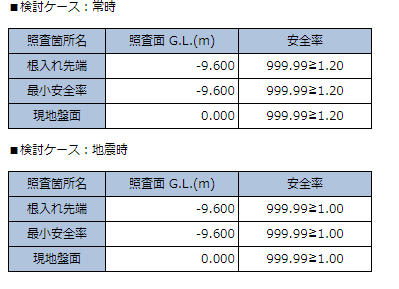

In [45]:
count = len(result_df)
# 常時
a1 = 1.2 / result_df['a1'] # 根入れ先端
a2 = 1.2 / result_df['a2'] # 最小安全率
a3 = 1.2 / result_df['a3'] # 現地盤面
ad = [max(a1[i], a2[i], a3[i]) for i in range(count)]
# 地震時
a4 = 1.0 / result_df['a4'] # 根入れ先端
a5 = 1.0 / result_df['a5'] # 根入れ先端
a6 = 1.0 / result_df['a6'] # 現地盤面
ae = [max(a4[i], a5[i], a6[i]) for i in range(count)]

print(ad)

[0.001200012000120001, 0.02799813345776948, 0.23715415019762848, 0.001200012000120001, 0.07021650087770626, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 0.028605482717520857, 0.054372451291345714, 0.002592016588906169, 0.020902281832433374, 0.1501877346683354, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 0.02214022140221402, 0.20905923344947733, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 0.22900763358778625, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 1.2903225806451613, 0.01603849238171612, 0.001200012000120001, 0.04836759371221282, 0.14218009478672985, 0.001200012000120001, 0.001200012000120001, 0.01019974500637484, 0.001200012000120001, 0.001200012000120001, 0.001200012000120001, 0.0918133129303749, 0.001200012000120001, 0.001200012000120001, 0.0

### 滑動、支持力
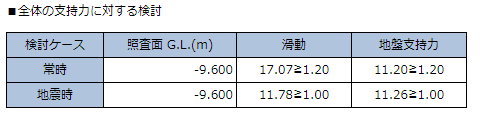

In [46]:
# 常時
b1 = 1.2 / result_df['b1'] # 滑動
b2 = 1.2 / result_df['b2'] # 地盤支持力
bd = [max(b1[i], b2[i]) for i in range(count)]
# 地震時
b3 = 1.0 / result_df['b3'] # 滑動
b4 = 1.0 / result_df['b4'] # 地盤支持力
be = [max(b3[i], b4[i]) for i in range(count)]

print(bd)

[0.01698033111645677, 0.07407407407407407, 0.19543973941368079, 0.03008272750062672, 0.2684563758389262, 0.1343784994400896, 0.007567635744466166, 0.019815059445178335, 0.14285714285714285, 0.15267175572519082, 0.040983606557377046, 0.005831470502478375, 0.10109519797809605, 0.10978956999085086, 0.03622094778146694, 0.008008008008008008, 0.04602991944764096, 0.2745995423340961, 0.06589785831960461, 0.0900225056264066, 0.015096238520568626, 0.023396373562097873, 0.21089630931458697, 0.23346303501945526, 0.15483870967741936, 0.032240730789897906, 0.004146939903929225, 0.08236101578586136, 0.01708914839077186, 0.03854802441374879, 0.03824091778202677, 0.16506189821182943, 0.5405405405405405, 0.1382488479262673, 0.00494417205718759, 0.07088009450679267, 0.11406844106463879, 0.041608876560332866, 0.17069701280227595, 0.06582556226001096, 0.0017400635123181996, 0.03879728419010669, 0.030112923462986198, 0.3305785123966942, 0.024575056317837397, 0.007270964614638876, 0.0701344243132671, 0.066

### 根入れ部の安定

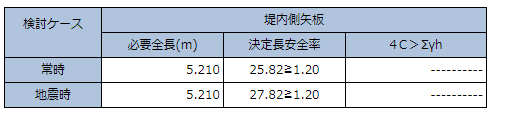

In [47]:
# 常時
cd = result_df['c2'] / result_df['c1'] 
# 地震時
ce = result_df['c4']  / result_df['c3'] 

print(cd)

0       0.001000
1       0.049689
2       0.236220
3       0.020192
4       0.235756
          ...   
8923    0.015364
8924    0.015364
8925    0.014428
8926    0.019118
8927    0.001000
Length: 8928, dtype: float64


### 遮水効果
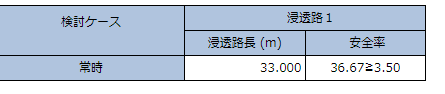

In [48]:
# 常時
d = result_df['d2']  / result_df['d1'] 

print(d)

0       0.030435
1       0.693069
2       1.250000
3       0.360825
4       0.498575
          ...   
8923    0.250896
8924    0.250896
8925    0.384615
8926    0.371156
8927    0.217391
Length: 8928, dtype: float64


### 矢板の耐力照査

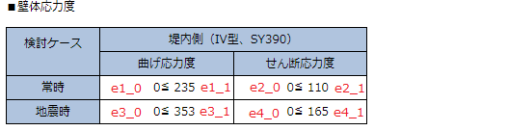

In [49]:
# 常時
e1 =  result_df['e1_0'] / result_df['e1_1'] 
e2 =  result_df['e2_0'] / result_df['e2_1'] 
ed = [max(e1[i], e2[i]) for i in range(count)]

# 地震時
e3 =  result_df['e3_0'] / result_df['e3_1'] 
e4 =  result_df['e4_0'] / result_df['e4_1'] 
ee = [max(e3[i], e4[i]) for i in range(count)]

print(ed)

[0.0, 0.05531914893617021, 0.35319148936170214, 0.005555555555555556, 0.04680851063829787, 0.00425531914893617, 0.0, 0.00425531914893617, 0.01276595744680851, 0.011111111111111112, 0.0, 0.011111111111111112, 0.12340425531914893, 0.5111111111111111, 0.022222222222222223, 0.00851063829787234, 0.06111111111111111, 0.08085106382978724, 0.011111111111111112, 0.06808510638297872, 0.016666666666666666, 0.15319148936170213, 0.1388888888888889, 0.0, 0.01276595744680851, 0.0, 0.0, 0.1, 0.0, 0.016666666666666666, 0.05555555555555555, 0.027777777777777776, 0.12777777777777777, 0.01702127659574468, 0.0, 0.4978723404255319, 0.18888888888888888, 0.027777777777777776, 0.005555555555555556, 0.05531914893617021, 0.0, 0.0, 0.02127659574468085, 0.03333333333333333, 0.00851063829787234, 0.0, 0.0, 0.0, 0.0, 0.03333333333333333, 0.0, 0.02127659574468085, 0.016666666666666666, 0.027777777777777776, 0.02553191489361702, 0.0, 0.07777777777777778, 0.2, 0.016666666666666666, 0.0, 0.07777777777777778, 0.0085106382

### タイロッドの耐力照査

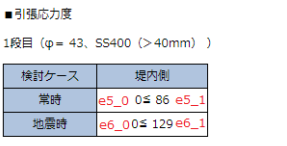

In [50]:
## 常時
e5 = result_df['e5_0'] / result_df['e5_1']
## 地震時
e6 = result_df['e6_0'] / result_df['e6_1']

print(e5)

0       0.000000
1       0.023256
2       1.818182
3       0.000000
4       0.078431
          ...   
8923    0.000000
8924    0.000000
8925    0.023256
8926    0.078431
8927    0.000000
Length: 8928, dtype: float64


### 腹起しの耐力照査

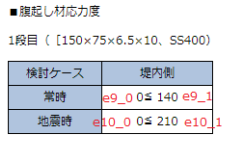

In [51]:
## 常時
e9 =  result_df['e9_0']  / result_df['e9_1'] 
## 地震時
e10 = result_df['e10_0'] / result_df['e10_1']

print(e9)

0       0.000000
1       0.010811
2       0.614286
3       0.000000
4       0.016216
          ...   
8923    0.000000
8924    0.000000
8925    0.007143
8926    0.014286
8927    0.000000
Length: 8928, dtype: float64


### 安全率のまとめ

1を超えたらNG 鉄道式

In [52]:
### 常時の安全率
constant = pd.DataFrame({
    'No': result_df['No'],
    'せん断変形破壊': ad,
    '滑動、支持力': bd,
    '根入れ部の安定': cd,
    '遮水効果': d,
    '矢板の耐力照査': ed,
    'タイロッドの耐力照査': e5,
    '腹起しの耐力照査': e9,
    })

constant.max()

No            30000.000000
せん断変形破壊           3.636364
滑動、支持力           12.000000
根入れ部の安定           1.171875
遮水効果              4.666667
矢板の耐力照査           8.922222
タイロッドの耐力照査       24.172727
腹起しの耐力照査          3.828571
dtype: float64

In [53]:
### 地震時の安全率
earthquake = pd.DataFrame({
    'No': result_df['No'],
    'せん断変形破壊': ae,
    '滑動、支持力': be,
    '根入れ部の安定': ce,
    '矢板の耐力照査': ee,
    'タイロッドの耐力照査': e6,
    '腹起しの耐力照査': e10,
    })

earthquake.max()

No            30000.000000
せん断変形破壊           4.347826
滑動、支持力            9.090909
根入れ部の安定           1.558442
矢板の耐力照査           6.944444
タイロッドの耐力照査       24.851064
腹起しの耐力照査          4.380952
dtype: float64

# 学習データと答えに分ける

## resultデータにある No のみを抽出する

In [55]:
# 常時の予測データ
train_csv1 = pd.merge(train_data, constant, on='No')
train_csv1.tail()

,No,堤体延長,堤体幅,左右壁体高さ,矢板の全長,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,引張材位置,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,中詰め粘着力,矢板型,矢板材料,引張材直径,引張材材料番号,腹起し材質,腹起し番号,堤外側水位_常時,堤内側水位_常時,堤外側水位_地震時,堤内側水位_地震時,震度,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査
8923,29995,25,9.2,8.1,10.9,8.0,2.3,0.0,1.6,7.5,18,1,38,12,96,75100,13,0,1,43,71,3,295,50,1,1,4,5.2,0.0,7.7,0.0,0.4,0.004561,0.033315,0.015364,0.250896,0.038298,0.000000,0.000000
8924,29996,29,10.4,5.4,14.1,5.3,1.5,0.0,0.8,4.3,12,1,48,26,134,15200,14,1,12,36,72,3,390,65,1,1,3,2.1,0.0,3.4,0.0,0.1,0.004561,0.033315,0.015364,0.250896,0.038298,0.000000,0.000000
8925,29997,19,7.7,4.2,13.2,4.1,1.6,0.0,1.6,3.0,15,0,32,40,270,194100,11,1,19,3,131,4,295,62,0,0,6,3.0,0.0,2.8,0.0,0.3,0.020281,0.027162,0.014428,0.384615,0.022222,0.023256,0.007143
8926,29999,11,11.5,4.3,11.9,4.2,1.6,0.0,0.8,2.0,18,1,12,37,85,14400,12,1,2,26,135,5,295,43,1,0,4,3.0,0.0,2.0,0.0,0.4,0.011119,0.048622,0.019118,0.371156,0.066667,0.078431,0.014286
8927,30000,26,3.5,7.3,13.2,7.2,0.8,0.0,0.8,1.4,16,0,11,37,279,93900,17,1,45,20,252,3,390,70,1,0,10,1.0,0.0,0.8,0.0,0.4,0.001222,0.009140,0.001000,0.217391,0.008511,0.000000,0.000000


In [56]:
# 地震時の予測データ
train_csv2 = pd.merge(train_data, earthquake, on='No')
train_csv2.head()

,No,堤体延長,堤体幅,左右壁体高さ,矢板の全長,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,引張材位置,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,中詰め粘着力,矢板型,矢板材料,引張材直径,引張材材料番号,腹起し材質,腹起し番号,堤外側水位_常時,堤内側水位_常時,堤外側水位_地震時,堤内側水位_地震時,震度,せん断変形破壊,滑動、支持力,根入れ部の安定,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査
0,20001,20,5.7,4.0,6.9,3.9,0.0,0.0,1.6,0.5,12,1,7,24,165,179400,12,1,20,42,190,3,390,35,1,1,6,0.1,0.0,0.7,0.0,0.1,0.018695,0.028074,0.001000,0.000000,0.006061,0.000000
1,20002,29,8.2,6.8,12.0,6.7,3.1,0.0,1.6,5.7,20,0,28,7,242,59700,13,0,43,28,192,4,390,67,0,1,5,4.3,0.0,4.2,0.0,0.1,0.061050,0.092081,0.054225,0.025496,0.007752,0.007143
2,20003,23,13.3,9.7,13.3,9.6,0.0,0.8,1.6,7.1,18,1,27,7,136,139100,17,0,35,22,9,5,390,28,1,0,1,8.4,0.1,2.2,0.6,0.5,1.000000,0.427350,0.401338,0.830028,4.527273,1.523810
3,20004,13,10.6,8.5,12.4,8.4,0.0,1.0,1.6,4.9,12,0,11,21,272,118900,15,1,42,34,69,3,295,90,1,1,3,3.0,0.2,2.0,0.7,0.1,0.040883,0.038300,0.012838,0.000000,0.000000,0.000000
4,20005,17,11.8,5.9,15.7,5.8,0.0,0.9,0.8,2.7,16,0,21,35,10,59000,15,0,2,27,70,3,390,40,1,1,2,5.5,0.4,4.4,0.6,0.4,0.628931,0.613497,1.176471,1.337110,0.437908,0.085714


## 予測する情報は、以下の 2項目 で常時のみ

1. "矢板の全長"
3.	"引張材位置"

### train_df データから 上記の2列 を train_labels という変数に抽出する



In [57]:
label = ["矢板の全長", "引張材位置", "腹起し番号"]

train_labels = train_csv1[label]

train_labels.head()

,矢板の全長,引張材位置,腹起し番号
0,6.9,0.5,6
1,12.0,5.7,5
2,13.3,7.1,1
3,12.4,4.9,3
4,15.7,2.7,2


In [58]:
# 要らないデータを消す
label1 = copy.deepcopy(label)
label1.append("No")
label1.append("堤外側水位_地震時")
label1.append("堤内側水位_地震時")
label1.append("震度")

train_data1 = train_csv1.drop(label1, axis=1)

train_data1.head()

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,中詰め粘着力,矢板型,矢板材料,引張材直径,引張材材料番号,腹起し材質,堤外側水位_常時,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,20,42,190,3,390,35,1,1,0.1,0.0,0.001200,0.016980,0.001000,0.030435,0.000000,0.000000,0.000000
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,43,28,192,4,390,67,0,1,4.3,0.0,0.027998,0.074074,0.049689,0.693069,0.055319,0.023256,0.010811
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,35,22,9,5,390,28,1,0,8.4,0.1,0.237154,0.195440,0.236220,1.250000,0.353191,1.818182,0.614286
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,42,34,69,3,295,90,1,1,3.0,0.2,0.001200,0.030083,0.020192,0.360825,0.005556,0.000000,0.000000
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,2,27,70,3,390,40,1,1,5.5,0.4,0.070217,0.268456,0.235756,0.498575,0.046809,0.078431,0.016216


In [59]:
# 要らないデータを消す
label2 = copy.deepcopy(label)
label2.append("No")
label2.append("堤外側水位_常時")
label2.append("堤内側水位_常時")

train_data2 = train_csv2.drop(label2, axis=1)

train_data2.head()

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,中詰め粘着力,矢板型,矢板材料,引張材直径,引張材材料番号,腹起し材質,堤外側水位_地震時,堤内側水位_地震時,震度,せん断変形破壊,滑動、支持力,根入れ部の安定,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,20,42,190,3,390,35,1,1,0.7,0.0,0.1,0.018695,0.028074,0.001000,0.000000,0.006061,0.000000
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,43,28,192,4,390,67,0,1,4.2,0.0,0.1,0.061050,0.092081,0.054225,0.025496,0.007752,0.007143
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,35,22,9,5,390,28,1,0,2.2,0.6,0.5,1.000000,0.427350,0.401338,0.830028,4.527273,1.523810
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,42,34,69,3,295,90,1,1,2.0,0.7,0.1,0.040883,0.038300,0.012838,0.000000,0.000000,0.000000
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,2,27,70,3,390,40,1,1,4.4,0.6,0.4,0.628931,0.613497,1.176471,1.337110,0.437908,0.085714


## データセットの保存

以下のスクリプトで、データセットのシェイプを確認します。
データは **8928**件 であることがわかります。

In [62]:
print("train_data1", train_data1.shape)
print("train_data2", train_data2.shape)
print("train_labels", train_labels.shape)

train_data1 (8928, 32)
train_data2 (8928, 32)
train_labels (8928, 3)


In [64]:
# csvファイルに保存する
train_data1.to_csv('train_data1.csv')
train_data2.to_csv('train_data2.csv')
train_labels.to_csv('train_labels.csv')